### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

# import libraries and data exploration

In [51]:
#this code imports panda libraries as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [52]:
#read data from a soucrce file
data = pd.read_csv('data/coupons.csv')

In [53]:
#explore the size of the dataset
data.shape

(12684, 26)

In [54]:
#description of the columns/attributes with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [55]:
#display the first 5 records of the dataset
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

# Dealing with missing values

In [56]:
# Get the number of null values in each field
print('----------------------------------------------------------------')
print("Attribute vs. Number of nulls")
print('----------------------------------------------------------------')
print(data.isnull().sum())  

# use this command to check for existence of ANY null values in the dataframe: false- no nulls exist. True- nulls exist
print('----------------------------------------------------------------')
print("Does the dataframe has null values?",data.isnull().values.any())  
print('----------------------------------------------------------------')


----------------------------------------------------------------
Attribute vs. Number of nulls
----------------------------------------------------------------
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
-----------------------------------------------

3. Decide what to do about your missing data -- drop, replace, other...

In [57]:
#Remove all rows wit NULL values from the DataFrame
data['car'].isnull().sum()

12576

In [58]:
#check all unique values unsed in car attributes; find out why NaN are so many under car attribute
#(appro. 99% values in car are NaN)
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [59]:
#similarly for bar, coffeeHouse, carryAway, RestaurantLessThan20, Restaurant20To50
print('BarValues :', data['Bar'].unique())
print('coffeeHouseValues :', data['CoffeeHouse'].unique())
print('carryAwayValues :', data['CarryAway'].unique())
print('RestaurantLessThan20Values :', data['RestaurantLessThan20'].unique())
print('Restaurant20To50Values :', data['Restaurant20To50'].unique())

BarValues : ['never' 'less1' '1~3' 'gt8' nan '4~8']
coffeeHouseValues : ['never' 'less1' '4~8' '1~3' 'gt8' nan]
carryAwayValues : [nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20Values : ['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50Values : ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


In [60]:
#check the size again, after issuing a dropna(). 
#We decide not to drop since 99% of the dataframe will be discard which would create a biased analysis
#data.dropna().shape

In [61]:
#Decission: fill Nan with "-999". A representation used by data enigeers to indicate missing values
#replace all missing values wiht "-999"
data = data.fillna("-999") 
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,-999,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,-999,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,-999,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,-999,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,-999,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 


In [62]:
#percent proportion of observations who accepted a coupon
acceptedCoupon = data[data['Y'] == 1]
didntAcceptCoupon = data[data['Y'] == 0] #computes those who sisnt accept coupons
print(f"percent proportion of observations who accepted a coupon: {(acceptedCoupon['Y'].count()/data['Y'].count()*100): .2f} %")

percent proportion of observations who accepted a coupon:  56.84 %


<Axes: >

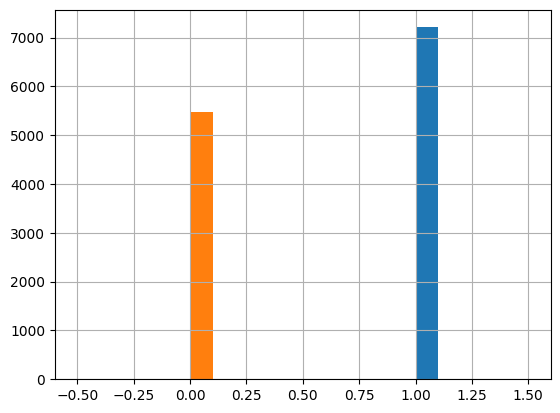

In [63]:
acceptedCoupon['Y'].hist()
didntAcceptCoupon['Y'].hist()


# Data visualization 

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'count')

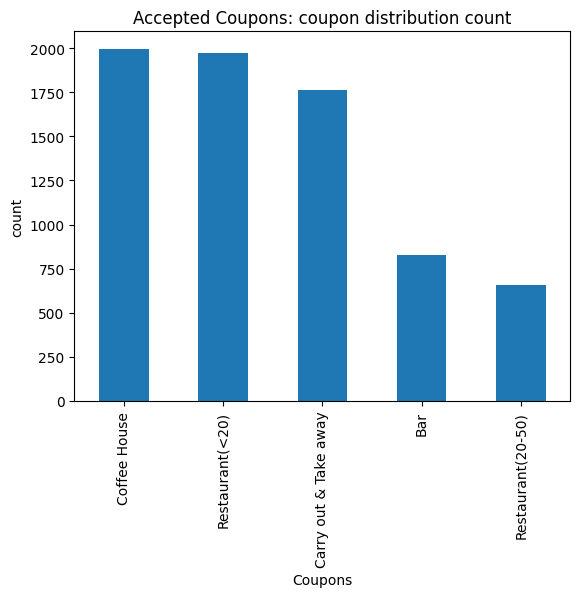

In [64]:
#display the distribution of coupons; taking only the proportion of observation that accepted coupons
acceptedCoupon['coupon'].value_counts().plot(kind = 'bar')
plt.title("Accepted Coupons: coupon distribution count")
plt.xlabel('Coupons')
plt.ylabel("count")

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'count')

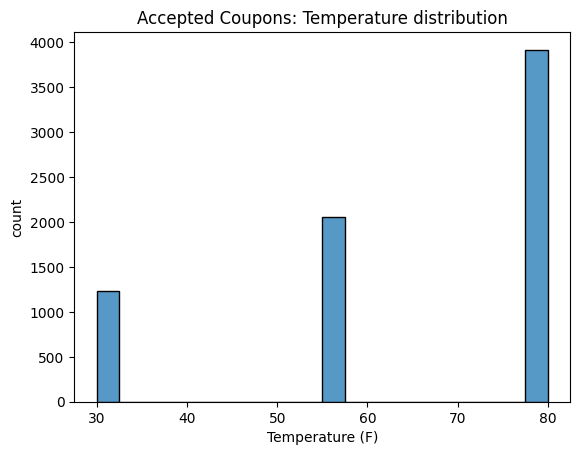

In [65]:
#histogram showing temperature distribution using seaborn libraries. We would like to see at what wheather temps were the most coupons accepted
data1=data[['temperature','Y']].query('Y==1')
sns.histplot(data=data1, x="temperature")
plt.title("Accepted Coupons: Temperature distribution")
plt.xlabel('Temperature (F)')
plt.ylabel("count")

Text(0, 0.5, 'count')

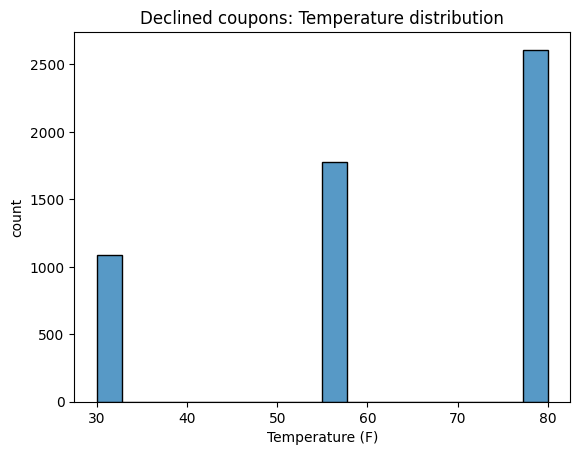

In [66]:
#histogram showing temperature distribution using seaborn libraries. We would like to see at what wheather temps were the most coupons accepted
data1=data[['temperature','Y']].query('Y==0')
sns.histplot(data=data1, x="temperature")
plt.title("Declined coupons: Temperature distribution")
plt.xlabel('Temperature (F)')
plt.ylabel("count")

In [67]:
#check unique values used in temperature
data['temperature'].unique()

array([55, 80, 30])

In [68]:
data['Bar'].tail(20)

12664    never
12665    never
12666    never
12667    never
12668    never
12669    never
12670    never
12671    never
12672    never
12673    never
12674    never
12675    never
12676    never
12677    never
12678    never
12679    never
12680    never
12681    never
12682    never
12683    never
Name: Bar, dtype: object

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
data[['coupon']]


,coupon
0,Restaurant(<20)
1,Coffee House
2,Carry out & Take away
3,Coffee House
4,Coffee House
...,...
12679,Carry out & Take away
12680,Carry out & Take away
12681,Coffee House
12682,Bar


2. What proportion of bar coupons were accepted?


In [70]:
data[['coupon','Y']].query('Y==1' and "coupon=='Bar'").count()

coupon    2017
Y         2017
dtype: int64

Text(0, 0.5, 'count')

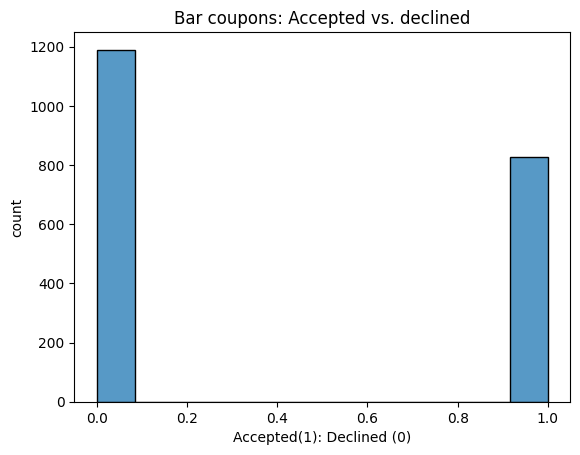

In [71]:
#plot showing 
data1=data[['coupon','Y']].query('Y==1' and "coupon=='Bar'")
sns.histplot(data=data1, x="Y")
plt.title("Bar coupons: Accepted vs. declined")
plt.xlabel('Accepted(1): Declined (0)')
plt.ylabel("count")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [72]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '-999', '4~8'], dtype=object)

In [73]:
lessthanthree = data[['coupon','Y','Bar']].query('Y==1' and "Bar=='1~3'" or "Bar=='less1'").count()
morethanthree = data[['coupon','Y','Bar']].query('Y==1' and "Bar=='4~8'" or "Bar=='gt8'").count()
print(f"Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more: {lessthanthree.count()/morethanthree.count()*100} %")



Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more: 100.0 %


In [74]:
lessthanthree = data[['coupon','Y','Bar']].query('Y==1' and "Bar=='1~3'" or "Bar=='less1'").count()
morethanthree = data[['coupon','Y','Bar']].query('Y==1' and "Bar=='4~8'" or "Bar=='gt8'").count()
print(f"Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more: {lessthanthree.count()/morethanthree.count()*100} %")



Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more: 100.0 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [75]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [76]:
morethanOne = data[['coupon','Y','Bar','age']].query('Y==1' and "Bar=='1~3'" or "Bar=='4~8'"or "Bar=='gt8'")
morethanOneAndGt25 = morethanOne[['coupon','Y','Bar', 'age']].query('age==26' and 'age==31'or 'age==36' or 'age==41' or 'age==46' or 'age==50plus')
allothers = data[['coupon','Y','Bar']].query('Y==1')
#morethanOneAndGt25/allothers
print(f"Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: {morethanOneAndGt25['Y'].count()/allothers['Y'].count()*100} %")


Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: 0.0 %


In [77]:
#Is there a difference?
print("There is no difference as the acceptance rate is zero")

There is no difference as the acceptance rate is zero


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [78]:
data['passanger'].unique()


array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [79]:
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [80]:
morethanOne = data[['coupon','Y','Bar','passanger','occupation']].query('Y==1' and "Bar=='1~3'" or "Bar=='4~8'"or "Bar=='gt8'")
notKids = morethanOne[['coupon','Y','Bar', 'passanger', 'occupation']].query("passanger!='Kid(s)'" and "occupation!='Farming'" or "occupation!='Fishing'" or"occupation!='Forestry'")
allothers = data[['coupon','Y','Bar']].query('Y==1')
print(f"Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to the all others: {notKids['Y'].count()/allothers['Y'].count()*100: .2f} %")


Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to the all others:  34.30 %


In [81]:
#Is there a difference?
print("There is difference as the acceptance rate is approx. 34.30 % ")

There is difference as the acceptance rate is approx. 34.30 % 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [82]:
#check all unique values of marital status. This command confirms if 'Widowed' is present
data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [83]:
#check all unique values of RestaurantLessThan20. 
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', '-999', 'never'], dtype=object)

In [84]:
#check unique values present in income attributes
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [85]:
morethanOne = data[['coupon','Y','Bar','passanger','maritalStatus','age','RestaurantLessThan20','income']].query('Y==1' and "Bar=='1~3'" or "Bar=='4~8'" or "Bar=='gt8'")
notWidowed = morethanOne[['coupon','Y', 'passanger', 'maritalStatus']].query("passanger!='Kid(s)'" and "maritalStatus !='Widowed'")
under30 = morethanOne[['coupon','Y', 'age']].query('age==21' or 'age==26' or "Bar=='below21'")
RestaurantLessThan20 = morethanOne[['coupon','Y', 'RestaurantLessThan20','income']].query("RestaurantLessThan20 =='4~8'" or "RestaurantLessThan20 =='gt8'")
RestaurantLessThan20Andlessthan50k = RestaurantLessThan20[['coupon','Y','income']].query("income == 'Less than $12500'" or "income == '$37500'"or "income == '$49999'" or "income == '$12500'" or "income == '$24999'" or "income == '$25000'" or "income == '$37499'")
allothers = data[['coupon','Y']].query('Y==1')
#acceptance rate for 1
print(f"Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {notWidowed['Y'].count()/allothers['Y'].count()*100: .2f} %")
#acceptance rate for 1
print(f"Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: {under30['Y'].count()/allothers['Y'].count()*100: .2f} %")
#acceptance rate for 1
print(f"Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {RestaurantLessThan20Andlessthan50k['Y'].count()/allothers['Y'].count()*100: .2f} %")
#print(f"Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to the all others: {notKids['Y'].count()/allothers['Y'].count()*100} %")


Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:  34.30 %
Acceptance rate of drivers who go to bars more than once a month and are under the age of 30:  0.00 %
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:  0.61 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [86]:
#for every 30 in 100 drivers who accept coupon and go to bars more than once a month, had passengers that were not a kid, and were not widowed

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Would you accept that coupon and take a short detour to the restaraunt? 

In [87]:
#Would you accept that coupon and take a short detour to the restaraunt? 
data['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [88]:
# driving home or work, but the restuarant is in the direction of destination.
detourDrivers = data[['coupon','Y','destination','direction_same']].query('Y==1' and "destination=='Home'" or "destination=='Work'" and 'direction_same==1')
allothers = data[['coupon','Y']].query('Y==1')
#acceptance rate for detour drivers
print(f"Acceptance rate of drivers who oake a short detour to the restaraunt: {detourDrivers['Y'].count()/allothers['Y'].count()*100: .2f} %")


Acceptance rate of drivers who oake a short detour to the restaraunt:  44.90 %


# Would you accept the coupon but use it on a subsequent trip? 

In [89]:
#check unique values for RestaurantLessThan20 to view number of trips more than 1 to the restuarant
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', '-999', 'never'], dtype=object)

In [90]:
#check unique values for Restaurant20To50 to view number of trips more than 1 to the restuarant
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', '-999'], dtype=object)

In [91]:
# driving home or work, but the restuarant is in the direction of destination, plus more than one trips to the restuarant
detourDrivers = data[['coupon','Y','destination','direction_same','RestaurantLessThan20','Restaurant20To50']].query('Y==1' and "destination=='Home'" or "destination=='Work'" and 'direction_same==1')
morethanOneTriptoRestaurant = detourDrivers[['coupon','Y', 'RestaurantLessThan20', 'Restaurant20To50']].query("RestaurantLessThan20=='1~3'" or "RestaurantLessThan20=='4~8'" or"RestaurantLessThan20=='gt8'" and "Restaurant20To50=='1~3'" or "Restaurant20To50=='4~8'" or"Restaurant20To50=='gt8'")
allothers = data[['coupon','Y']].query('Y==1')
#acceptance rate for drivers with fruquent trips to the restaurant
print(f"Acceptance rate of drivers who oake a short detour to the restaraunt: {morethanOneTriptoRestaurant['Y'].count()/allothers['Y'].count()*100: .2f} %")


Acceptance rate of drivers who oake a short detour to the restaraunt:  19.53 %


In [92]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

# What if the coupon was for a bar instead of a restaraunt? 

In [93]:
barCoupon=data[['coupon','Y']].query('Y==1' and 'coupon=="Bar"')
restaurantCoupon=data[['coupon','Y']].query('Y==1' and 'coupon=="Restaurant(<20)"' or 'coupon=="Restaurant(20-50)"')
allothers = data[['coupon','Y']].query('Y==1')


print(f"Acceptance rate of bar coupons: {barCoupon['Y'].count()/allothers['Y'].count()*100: .2f} %")
print(f"Acceptance rate of restaurant coupons: {restaurantCoupon['Y'].count()/allothers['Y'].count()*100: .2f} %")

Acceptance rate of bar coupons:  27.98 %
Acceptance rate of restaurant coupons:  38.64 %


# #What about a coffee house? 

In [94]:
coffeeHouseCoupon=data[['coupon','Y']].query('Y==1' and "coupon=='Coffee House'")
allothers = data[['coupon','Y']].query('Y==1')

print(f"Acceptance rate of coffee house coupons: {coffeeHouseCoupon['Y'].count()/allothers['Y'].count()*100: .2f} %")


Acceptance rate of coffee house coupons:  55.42 %


# Would you accept a bar coupon with a minor passenger in the car? 

In [95]:
barCouponWithMinor=data[['coupon','Y','passanger']].query('Y==1' and "coupon=='Coffee House'" and "passanger=='Kid(s)'")
allothers = data[['coupon','Y']].query('Y==1')

print(f"Acceptance rate of coffee house coupons: {barCouponWithMinor['Y'].count()/allothers['Y'].count()*100: .2f} %")


Acceptance rate of coffee house coupons:  13.95 %


# What about if it was just you and your partner in the car? 

In [96]:
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [97]:
barCouponWithMinor=data[['coupon','Y','passanger']].query('Y==1' and "coupon=='Coffee House'" and "passanger=='Alone'" or "passanger=='Partner'")
allothers = data[['coupon','Y']].query('Y==1')

print(f"Acceptance rate of coffee house coupons: {barCouponWithMinor['Y'].count()/allothers['Y'].count()*100: .2f} %")




Acceptance rate of coffee house coupons:  101.32 %


# Would weather impact the rate of acceptance? What about the time of day?

In [98]:
data['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [99]:
couponWithSunny=data[['coupon','Y','weather']].query('Y==1' and "weather=='Sunny'")
couponWithRainy=data[['coupon','Y','weather']].query('Y==1' and "weather=='Rainy'")
couponWithSnowy=data[['coupon','Y','weather']].query('Y==1' and "weather=='Snowy'")

#Rainy and Snowy
couponWithRainyAndSnowy=data[['coupon','Y','weather']].query('Y==1' and "weather=='Rainy'" and "weather=='Snowy'")
#Sunny and Snowy
couponWithSunnyAndSnowy=data[['coupon','Y','weather']].query('Y==1' and "weather=='Sunny'" and "weather=='Snowy'")

allothers = data[['coupon','Y']].query('Y==1')

print(f"Acceptance rate of coupons on a sunny day: {couponWithSunny['Y'].count()/allothers['Y'].count()*100: .2f} %")
print(f"Acceptance rate of coupon on a rainy day: {couponWithRainy['Y'].count()/allothers['Y'].count()*100: .2f} %")
print(f"Acceptance rate of coupon on a snowy day: {couponWithSnowy['Y'].count()/allothers['Y'].count()*100: .2f} %")
print(f"Acceptance rate of coupon on a rainy and snowy day: {couponWithRainyAndSnowy['Y'].count()/allothers['Y'].count()*100: .2f} %")
print(f"Acceptance rate of coupon on a sunny and snowy day: {couponWithSunnyAndSnowy['Y'].count()/allothers['Y'].count()*100: .2f} %")



Acceptance rate of coupons on a sunny day:  139.65 %
Acceptance rate of coupon on a rainy day:  16.78 %
Acceptance rate of coupon on a snowy day:  19.49 %
Acceptance rate of coupon on a rainy and snowy day:  19.49 %
Acceptance rate of coupon on a sunny and snowy day:  19.49 %


# Would you ignore the coupon entirely? 

In [100]:
#I would not accept the coupon, except under two conditions: 
#1) if it is a coffee house coupon and the weather is sunny, and 
#2) if I'm driving with a partner in the car. 
#These two scenarios show an acceptance rate of over 100 percent.